# **Data3406 - week9**

> Authur: Ran Sun

### **Notebook for further data cleanings and explorations.**



---
(This notebook is copied from the pre-processed dataset from tpp08.)




> *Importing libraries required for data cleanings and explorations below.*


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

> Reading modified data from a csv file.

In [37]:
M5=pd.read_csv('/content/drive/MyDrive/Modifydata/modifydata.csv')
M5.head() # Check the structure of dataset.
print(M5.dtypes)# Check type of variables.

Date     object
Count     int64
dtype: object


> Convert object type into datetime types


In [38]:
M5['Date'].replace('-','',regex=True,inplace=True) # replace some unwanted parts of character.
M5.head()
M5['Date'] = pd.to_datetime(M5['Date'], format='%Y%m%d')# convert it into normalized forms.
print(M5.dtypes)

Date     datetime64[ns]
Count             int64
dtype: object


In [39]:
M5.head()# Check modfied data

,Date,Count
0,2022-01-01,114
1,2022-01-02,8681
2,2022-01-03,5104
3,2022-01-04,8031
4,2022-01-05,7743


> Aggregate by weekly data

In [40]:
M5_clean=M5 
M5_clean=M5_clean.resample('W-Mon', on='Date').sum() # resample into week
M5_clean.head() # check the weekly step counts.

,Count
Date,
2022-01-03,13899
2022-01-10,27776
2022-01-17,0
2022-01-24,0
2022-01-31,4


> Extracting trend from weekly data

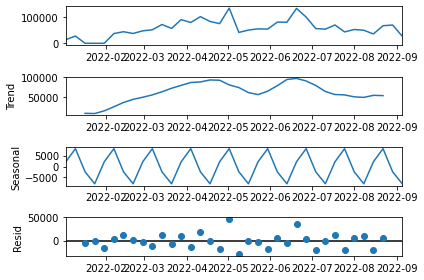

In [66]:
# Basic time series model: step count(t) = Level(t) + Trend(t) + Seasonality(t) + Noise(t), where t = any day
m4=M5_clean
m4['date']=m4.index
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(m4.drop(columns=['date']), model = 'additive',period=4)
fig = decomposition.plot()


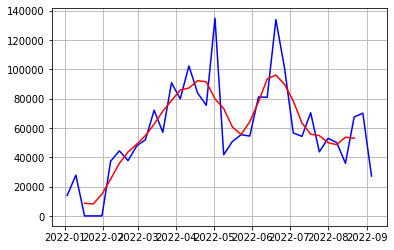

In [64]:
# plot trend on matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
fig, ax = plt.subplots()
ax.grid(True)
plt.plot(m4.index, m4['Count'], c='blue')
plt.plot(decomposition.trend.index, decomposition.trend, c='red')


#### **Visualization conclusions**

> `Trends`

*   From trend graph above, we could see there is a incaresing trend from week to week until May.



> `Seasonality `

*  From seasonal graph , we could see there is a weekly step amplitude with approximately 5000 to -5000 .













